# CodSoft Task 1:

<b> TITANIC SURVIVAL PREDICTION

1) importing neccessary libraries and dataset

In [221]:
import pandas as pd
import numpy as np

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
df = pd.read_csv("tested.csv")

2) Exploring the Dataset

In [224]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


3) Checking and Handling NULL values

In [226]:
df['Cabin'].isnull().sum()

327

In [227]:
df = df.drop(['Cabin'],axis=1)

In [228]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [229]:
df = df.dropna()

In [230]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Visualizing the Attributes

count plot to find out the number of passenger who survived or not.

Text(0.5, 1.0, 'Survival distribution')

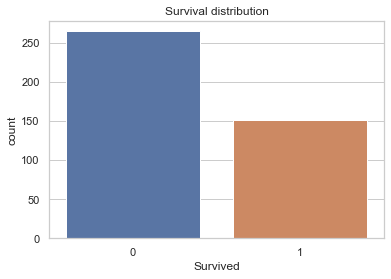

In [231]:
sns.countplot(data = df,x = 'Survived')
plt.title('Survival distribution')

Count plot to find out the number of passenger from each class

Text(0.5, 1.0, 'Passenger class distribution')

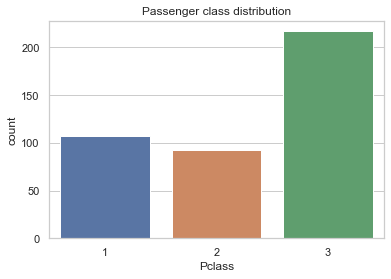

In [232]:
sns.countplot(data = df, x = 'Pclass')
plt.title('Passenger class distribution')

Count plot to Count the number of passenger from each gender

Text(0.5, 1.0, 'Gender distribution')

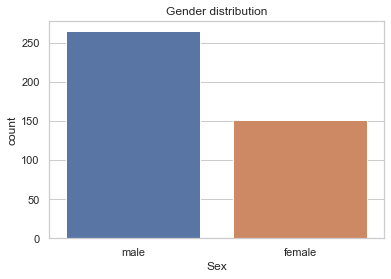

In [233]:
sns.countplot(data= df, x='Sex')
plt.title('Gender distribution')

Price distribution using Histogram to find out how many passenger bought the ticket at a specific Price.

Text(0.5, 1.0, 'Price distribution')

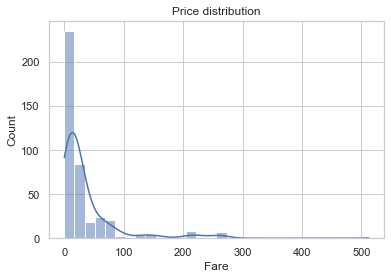

In [234]:
sns.histplot(data = df, x ='Fare', bins = 30, kde =True)
plt.title('Price distribution')

plotting the Count graph from the Embarked to find how many Passenger got onboard from which port

Text(0.5, 1.0, 'Embarked Port Distribution')

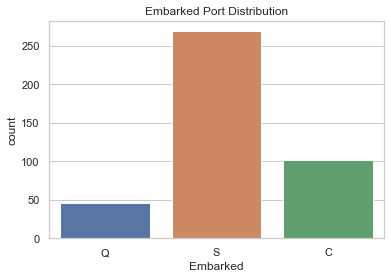

In [235]:
sns.countplot(data = df, x ='Embarked')
plt.title('Embarked Port Distribution')

Finding Out the Correlation

In [236]:
CM = df.corr()
CM

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.024117,-0.025800,-0.028387,0.003259,0.042650,0.008211
Survived,-0.024117,1.000000,-0.107203,0.004364,0.099136,0.158534,0.191514
Pclass,-0.025800,-0.107203,1.000000,-0.449310,0.002136,0.019581,-0.577147
Age,-0.028387,0.004364,-0.449310,1.000000,-0.077222,-0.043080,0.329071
SibSp,0.003259,0.099136,0.002136,-0.077222,1.000000,0.306566,0.171539
Parch,0.042650,0.158534,0.019581,-0.043080,0.306566,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.329071,0.171539,0.230046,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

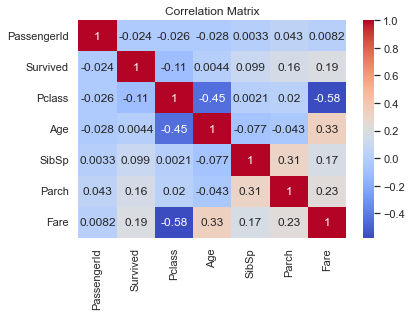

In [237]:
sns.heatmap(CM,annot = True,cmap ='coolwarm')
plt.title('Correlation Matrix')

This scatter plot graph represent the AGE vs FARE

Text(0.5, 1.0, 'Age vs Fare')

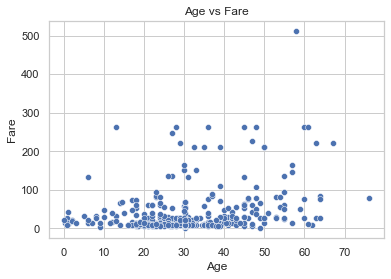

In [238]:
sns.scatterplot(data= df,x ='Age',y = 'Fare')
plt.title('Age vs Fare')

# Predicting Titanic Survivors

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [240]:
df = pd.get_dummies(df, columns=['Sex'])

In [241]:
x = df[['Pclass','Age','Fare','Sex_female','Sex_male','Parch','PassengerId']]

In [242]:
y = df['Survived']

In [243]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [244]:
logm = LogisticRegression()

In [245]:
logm.fit(x_train,y_train)

LogisticRegression()

In [246]:
pred = logm.predict(x_test)

In [247]:
accuracy = accuracy_score(y_test,pred)
accuracy

1.0

# confusion matrix

we had to build the confusion matrix because the accuracy result was 100% which is not natural
or practical.

In [248]:
confusion_matrix(y_test,pred)

array([[50,  0],
       [ 0, 34]], dtype=int64)